In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
blk=pd.read_csv("https://raw.githubusercontent.com/stellahrotich/MLProjects101/master/BlackFriday.csv")
blk.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
blk = blk.astype({"Occupation": str}, errors='ignore') 
blk = blk.astype({"Product_Category_1": str}, errors='ignore')
blk = blk.astype({"Marital_Status": str}, errors='ignore')

In [ ]:
blk.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [ ]:
blk.shape

(537577, 12)

In [ ]:
blk.Gender.describe()

count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object

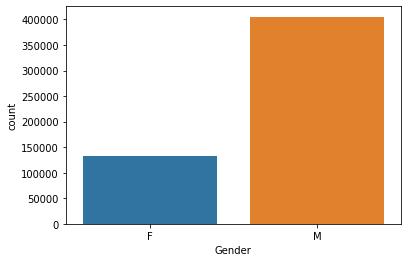

In [ ]:
sns.countplot(x="Gender",data=blk)

In [ ]:
blk.Age.describe()

count     537577
unique         7
top        26-35
freq      214690
Name: Age, dtype: object

In [ ]:
blk.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

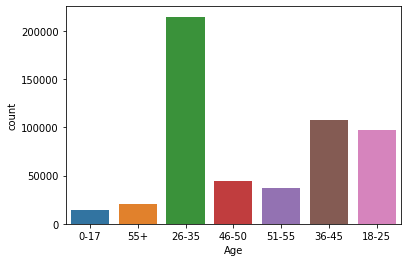

In [ ]:
sns.countplot(x="Age",data=blk)

In [ ]:
blk.Occupation.describe()

count     537577
unique        21
top            4
freq       70862
Name: Occupation, dtype: object

In [ ]:
blk.Occupation.nunique()

21

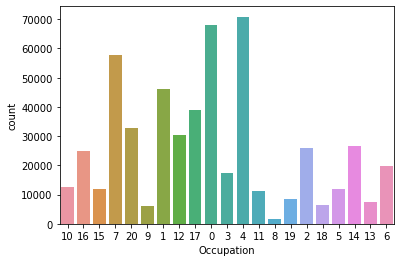

In [ ]:
sns.countplot(x="Occupation",data=blk)

In [ ]:
blk.City_Category.describe()

count     537577
unique         3
top            B
freq      226493
Name: City_Category, dtype: object

In [ ]:
blk.City_Category.nunique()

3

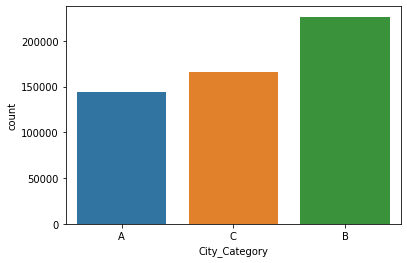

In [ ]:
sns.countplot(x="City_Category",data=blk)

In [ ]:
blk.Stay_In_Current_City_Years.describe()

count     537577
unique         5
top            1
freq      189192
Name: Stay_In_Current_City_Years, dtype: object

In [ ]:
blk.Stay_In_Current_City_Years.nunique()

5

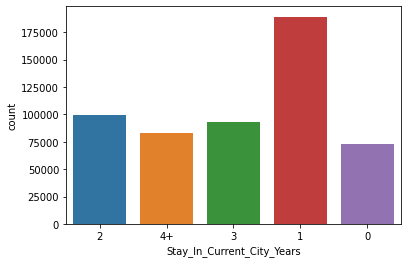

In [ ]:
sns.countplot(x="Stay_In_Current_City_Years",data=blk)

In [ ]:
blk.Marital_Status.describe()

count     537577
unique         2
top            0
freq      317817
Name: Marital_Status, dtype: object

In [ ]:
blk.Marital_Status.nunique()

2

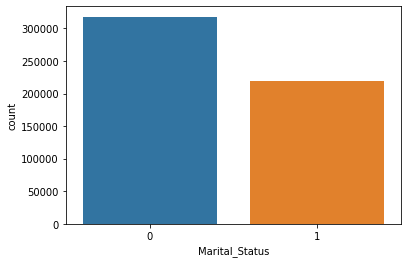

In [ ]:
sns.countplot(x="Marital_Status",data=blk)

In [ ]:
blk.Product_Category_1.describe()

count     537577
unique        18
top            5
freq      148592
Name: Product_Category_1, dtype: object

In [ ]:
blk.Product_Category_1.nunique()

18

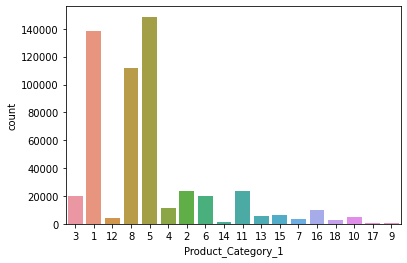

In [ ]:
sns.countplot(x="Product_Category_1",data=blk)

In [ ]:
blk.Product_Category_2.describe()

count    370591.000000
mean          9.842144
std           5.087259
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [ ]:
blk.Product_Category_2.isnull().sum()

166986

In [ ]:
blk.Product_Category_2.nunique()

17

In [ ]:
blk.Product_Category_2.fillna("Others",inplace=True)

In [ ]:
blk.Product_Category_3.describe()

count    164278.000000
mean         12.669840
std           4.124341
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [ ]:
blk.Product_Category_3.isnull().mean()

0.6944102891306734

In [ ]:
blk.drop(["User_ID","Product_ID","Product_Category_3"],axis=1,inplace=True)

In [ ]:
blk.shape

(537577, 9)

In [ ]:
X=blk[["Purchase","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category_1","Product_Category_2"]]

In [ ]:
X.shape

(537577, 9)

In [ ]:
X1=pd.get_dummies(X)

In [ ]:
X1.shape

(537577, 77)

In [ ]:
X1.head(4)

,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_Others
0,8370,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15200,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1422,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1057,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X1)
scaled_data=scaler.transform(X1)

In [ ]:
x1= pd.DataFrame(scaled_data)
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.344255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.631519,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052027,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.036676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.327389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y=x1.iloc[:,0]
x=x1.drop(0,axis=1)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =50)

<h2>Linear Regression</h2>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

Train Score = 0.6337268163170318
Test Score = 0.6350019292193978


<h2>DecisionTreeRegressor</h2>

In [ ]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))

Train Score = 0.7414397697107935
Test Score = 0.6010711301732097


<h2>RandomForestRegressor</h2>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
model2.score(x_train,y_train)

0.736320031352222

In [ ]:
model2.score(x_test,y_test)

0.6340068683854952

<h2>GradientBoostingRegressor</h2>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
model3.score(x_train,y_train)

0.6307573130620139

In [ ]:
model3.score(x_test,y_test)

0.6323638627864772

<h2>AdaBoostRegressor</h2>

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
regress.score(x_train,y_train)

0.4381583246604184

In [ ]:
regress.score(x_test,y_test)

0.4382655812473555

In [ ]:
import pickle #converts to binary file 
file = open("Blackfriday_FinalModel.pkl","wb") #open a file where you want to store the data

In [ ]:
#final model
modelf=DecisionTreeRegressor().fit(x,y)
print("Score =",modelf.score(x,y))

Score = 0.7337325492409374


In [ ]:
#dump information to that file
pickle.dump(modelf,file)